# Author:-Pooja Deepak Sahu

# Data Science and Business Analytics Tasks(GRIP JAN 2023) (INTERNSHIP)

# Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
 As a security/defense analyst, try to find out the hot zone of terrorism.

IMPORTING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

READING THE DATASET

In [3]:
df=pd.read_csv(r"C:\Users\Sujal Sahu\Downloads\Global Terrorism - START data\globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

EDA

In [29]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
df.shape

(181691, 135)

In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

So here we can see that there are 135 columns.All the columns are not useful for our dataset.So we try to take only those columns which are impactful and meaningful for our datset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [10]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Gang_name','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [11]:
df=df[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype','Killed','Wounded','Summary','Gang_name','Weapon_type','Motive']]

In [12]:
df.head()

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Killed,Wounded,Summary,Gang_name,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,1.0,0.0,NaN,MANO-D,Unknown,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",0.0,0.0,NaN,23rd of September Communist League,Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,1.0,0.0,NaN,Unknown,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,NaN,NaN,Unknown,Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,NaN,NaN,Unknown,Incendiary,NaN


In [13]:
df.tail()

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Killed,Wounded,Summary,Gang_name,Weapon_type,Motive
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,Military Checkpoint,1.0,2.0,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Firearms,NaN
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,2.0,7.0,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Explosives,NaN
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,0.0,0.0,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,NaN
181689,2017,12,31,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Government Building/Facility/Office,0.0,0.0,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Explosives,NaN
181690,2017,12,31,Philippines,Southeast Asia,Maguindanao,Cotabato City,Bombing/Explosion,Unknown,NaN,0.0,0.0,12/31/2017: An explosive device was discovered...,Unknown,Explosives,NaN


In [15]:
df.shape

(181691, 16)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   State           181270 non-null  object 
 6   City            181257 non-null  object 
 7   Attack_type     181691 non-null  object 
 8   Target_type     181691 non-null  object 
 9   Target_subtype  171318 non-null  object 
 10  Killed          171378 non-null  float64
 11  Wounded         165380 non-null  float64
 12  Summary         115562 non-null  object 
 13  Gang_name       181691 non-null  object 
 14  Weapon_type     181691 non-null  object 
 15  Motive          50561 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 22.2+ 

In [17]:
df.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
State                421
City                 434
Attack_type            0
Target_type            0
Target_subtype     10373
Killed             10313
Wounded            16311
Summary            66129
Gang_name              0
Weapon_type            0
Motive            131130
dtype: int64

In [18]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)

In [19]:
df.describe()

,Year,Month,Day,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.266860,2.883296
std,13.259430,3.388303,8.814045,11.227057,34.309747
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


Inferences:
1)The dataset consists of terrorist activities from 1970 to 2017.
2)Maximum number of people killed worldwide are 1570.
3)Maximum number of people wounded worldwide are 8191.

DATA VISUALIZATION

TOTAL NUMBER OF ATTACKS YEARWISE(1970-2017)

In [29]:
attacks=df['Year'].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index('Year')
attacks

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581
1975,740
1976,923
1977,1319
1978,1526


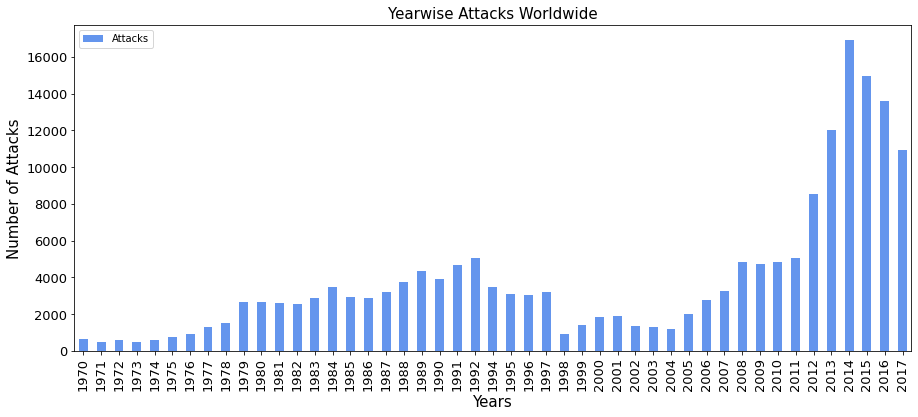

In [30]:
attacks.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Yearwise Attacks Worldwide",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

Inference:
So here we can see that 2014 has highest number of terrorist attacks.

METHODS OF ATTACKS

In [42]:
attacktype=df["Attack_type"].value_counts()
attacktype

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_type, dtype: int64

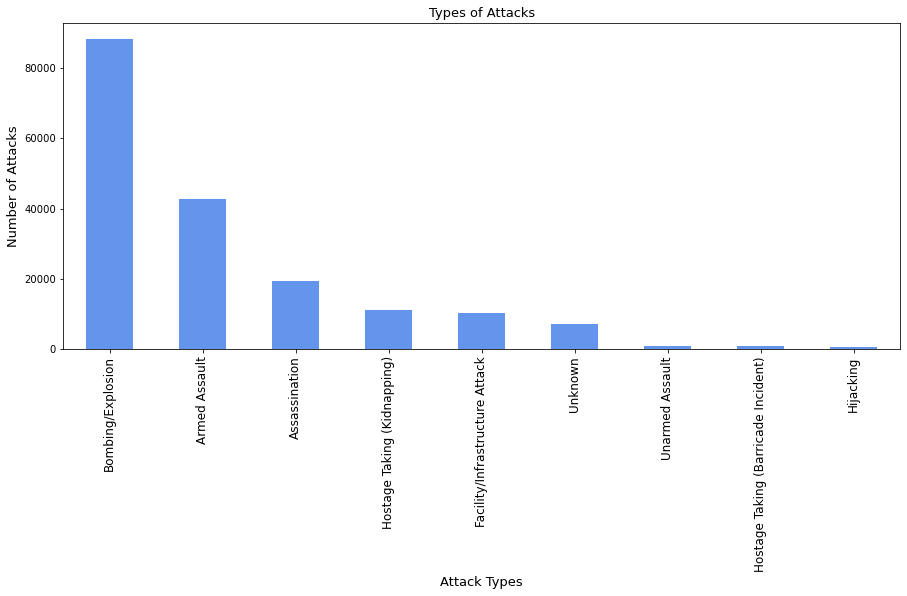

In [43]:
attacktype.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Attacks",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

Inference:Here we can conclude that Bombing Explosion type is the most used attack type worldwide between 1970 to 2017.


TERRORIST ACTIVITIES BY REGION IN EACH YEAR.

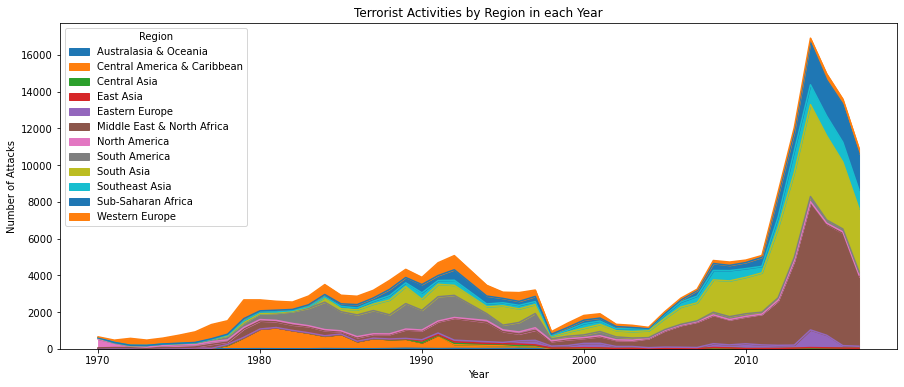

In [45]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [50]:
region_wise=df["Region"].value_counts()
region_wise

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

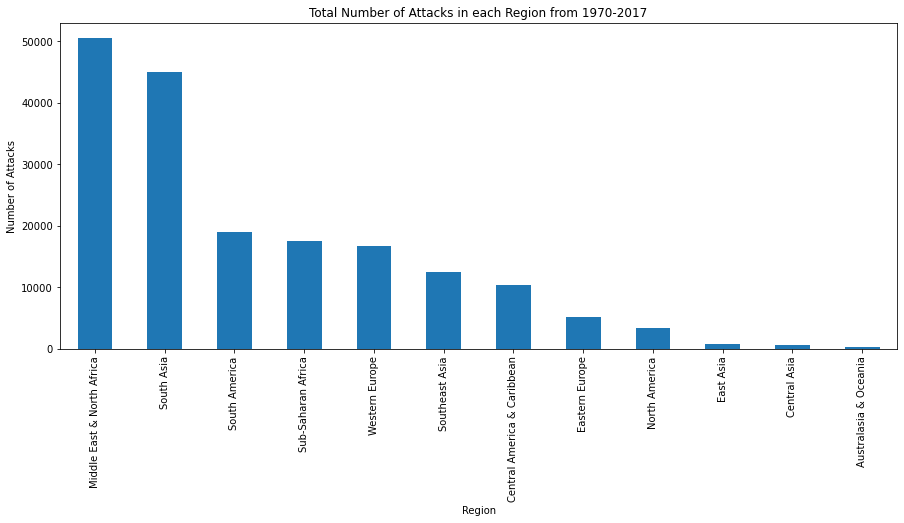

In [51]:
region_wise.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

Inference:
In region of Middle east and north africa maximum number of attacks had seen.

MOST ACTIVE TERRORIST ORGANIZATION.

In [53]:
terrorist_groups=df["Gang_name"].value_counts()[1:10]
terrorist_groups

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Gang_name, dtype: int64

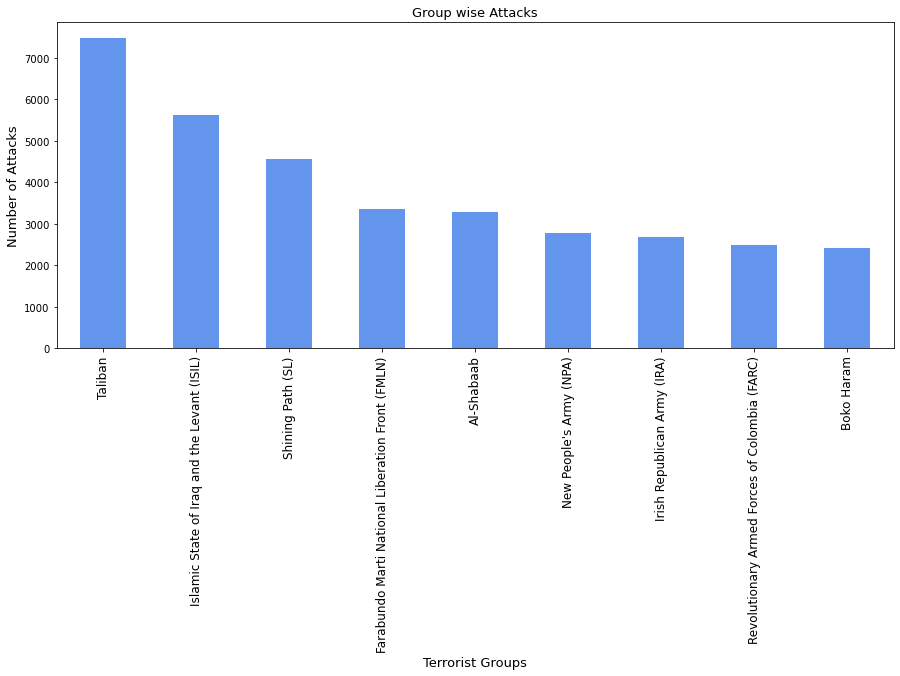

In [54]:
terrorist_groups.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

Inference:
Among all the terrorist groups worldwide Taliban is the most active group with 7478 number of attacks in the world.

MOST TERRORISM AFFECTED COUNTRIES

In [55]:
country_affected=df["Country"].value_counts().head(10)
country_affected

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

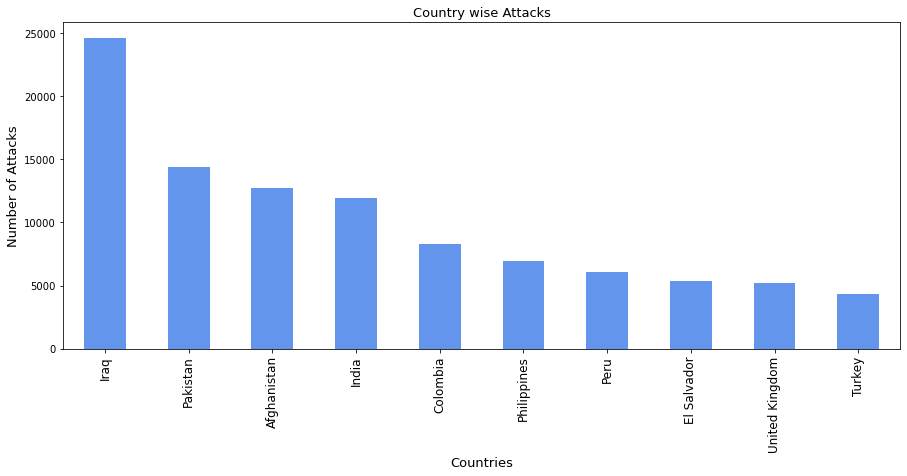

In [56]:
country_affected.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

Inference:
Iraq is the most affected country with the 24636 attacks.